<a href="https://colab.research.google.com/github/Rojakarilakshmiprasanna/SCT_ML/blob/main/SCT_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2  Female   21                  15                      81
2           3  Female   20                  16                       6
3           4    Male   23                  16                      77
4           5  Female   31                  17                      40


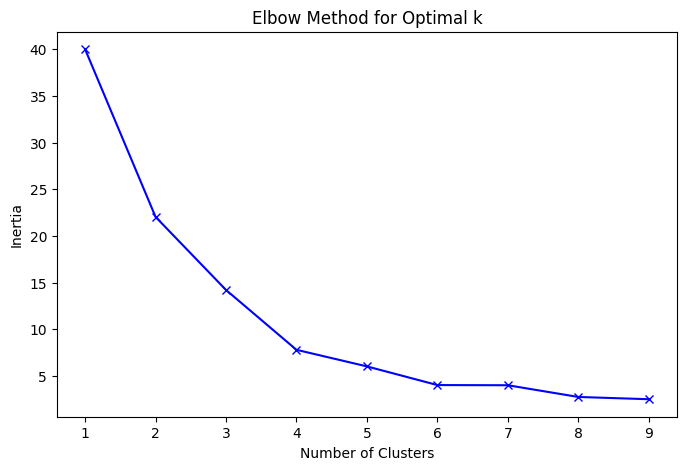

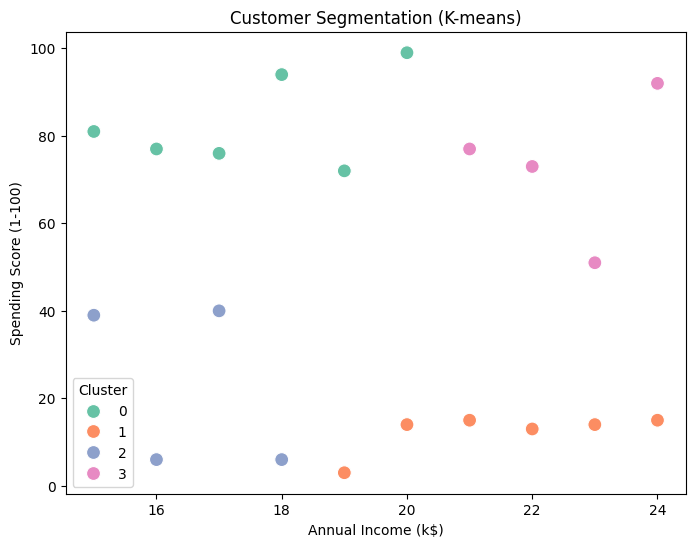


Cluster Centers:
 [[17.5        83.16666667]
 [21.5        12.33333333]
 [16.5        22.75      ]
 [22.5        73.25      ]]


In [2]:
# Install libraries (if not already installed)
!pip install pandas matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --------------------------
# 1. Create the Dataset
# --------------------------
data = {
    'CustomerID': range(1, 21),
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female',
               'Male', 'Female', 'Female', 'Male', 'Male',
               'Female', 'Male', 'Male', 'Female', 'Female',
               'Male', 'Female', 'Male', 'Female', 'Male'],
    'Age': [19, 21, 20, 23, 31, 22, 35, 23, 64, 30,
            67, 35, 58, 24, 37, 49, 39, 40, 23, 31],
    'Annual Income (k$)': [15, 15, 16, 16, 17, 17, 18, 18, 19, 19,
                           20, 20, 21, 21, 22, 22, 23, 23, 24, 24],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72,
                                14, 99, 15, 77, 13, 73, 14, 51, 15, 92]
}

df = pd.DataFrame(data)

# Display first rows
print(df.head())

# --------------------------
# 2. Select features for clustering
# --------------------------
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------
# 3. Find optimal number of clusters (Elbow method)
# --------------------------
inertia = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

# Plot Elbow graph
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# --------------------------
# 4. Apply K-means clustering
# --------------------------
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# --------------------------
# 5. Visualize clusters
# --------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set2',
    data=df,
    s=100
)
plt.title('Customer Segmentation (K-means)')
plt.show()

# --------------------------
# 6. Show cluster centers
# --------------------------
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCluster Centers:\n", centers)